In [13]:
%matplotlib inline

import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import spearmanr
import statsmodels.api as sm
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

plt.style.use('seaborn-darkgrid')

In [14]:
HPSCapDF = pd.read_csv('COVID_HPSCapita.csv', index_col = 0)
HPSCapDF.head()

,State,cases,deaths,Personal Health Care Expenses Per State Capita (2014),Hospital Services Expenses Per State Capita (2014),Physician and Clinical Services Expenses Per State Capita (2014),Other Professional Services Expenses Per State Capita (2014),Home Health Care Expenses Per State Capita (2014),Drugs and Non-Durables Expenses Per State Capita (2014),Durables Expenses Per State Capita (2014),Other Health Care Expenses Per State Capita (2014),Total Health Care Expenses Per State Capita (2014)
0,Alabama,387786,14345,7281.0,2625.0,1739.0,170.0,202.0,1407.0,142.0,324.0,13890.0
1,Alaska,18316,367,11064.0,4715.0,3368.0,465.0,195.0,640.0,139.0,797.0,21383.0
2,Arizona,426614,18857,6452.0,2337.0,1774.0,248.0,136.0,814.0,175.0,347.0,12283.0
3,Arkansas,161569,3301,7408.0,2673.0,1635.0,262.0,181.0,1169.0,104.0,635.0,14067.0
4,California,2664110,102387,7549.0,2753.0,1983.0,217.0,291.0,955.0,97.0,495.0,14340.0


In [15]:
HPSCapDF = HPSCapDF.drop(columns = ['cases', 'deaths'])
HPSCapDF.head()

,State,Personal Health Care Expenses Per State Capita (2014),Hospital Services Expenses Per State Capita (2014),Physician and Clinical Services Expenses Per State Capita (2014),Other Professional Services Expenses Per State Capita (2014),Home Health Care Expenses Per State Capita (2014),Drugs and Non-Durables Expenses Per State Capita (2014),Durables Expenses Per State Capita (2014),Other Health Care Expenses Per State Capita (2014),Total Health Care Expenses Per State Capita (2014)
0,Alabama,7281.0,2625.0,1739.0,170.0,202.0,1407.0,142.0,324.0,13890.0
1,Alaska,11064.0,4715.0,3368.0,465.0,195.0,640.0,139.0,797.0,21383.0
2,Arizona,6452.0,2337.0,1774.0,248.0,136.0,814.0,175.0,347.0,12283.0
3,Arkansas,7408.0,2673.0,1635.0,262.0,181.0,1169.0,104.0,635.0,14067.0
4,California,7549.0,2753.0,1983.0,217.0,291.0,955.0,97.0,495.0,14340.0


In [16]:
COVID = pd.read_csv('COVID.csv', index_col = 0)
COVID.head()

,State,cases,deaths
0,Alabama,26912,785
1,Alaska,751,10
2,Arizona,39298,1228
3,Arkansas,13191,188
4,California,159098,5202


In [17]:
HPSCapDF = pd.merge(HPSCapDF, COVID, how = 'left', on = 'State')
HPSCapDF.head()

,State,Personal Health Care Expenses Per State Capita (2014),Hospital Services Expenses Per State Capita (2014),Physician and Clinical Services Expenses Per State Capita (2014),Other Professional Services Expenses Per State Capita (2014),Home Health Care Expenses Per State Capita (2014),Drugs and Non-Durables Expenses Per State Capita (2014),Durables Expenses Per State Capita (2014),Other Health Care Expenses Per State Capita (2014),Total Health Care Expenses Per State Capita (2014),cases,deaths
0,Alabama,7281.0,2625.0,1739.0,170.0,202.0,1407.0,142.0,324.0,13890.0,26912,785
1,Alaska,11064.0,4715.0,3368.0,465.0,195.0,640.0,139.0,797.0,21383.0,751,10
2,Arizona,6452.0,2337.0,1774.0,248.0,136.0,814.0,175.0,347.0,12283.0,39298,1228
3,Arkansas,7408.0,2673.0,1635.0,262.0,181.0,1169.0,104.0,635.0,14067.0,13191,188
4,California,7549.0,2753.0,1983.0,217.0,291.0,955.0,97.0,495.0,14340.0,159098,5202


In [18]:
HPSCapDF.shape

(51, 12)

In [19]:
HPSCapDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   State                                                             51 non-null     object 
 1   Personal Health Care Expenses Per State Capita (2014)             51 non-null     float64
 2   Hospital Services Expenses Per State Capita (2014)                51 non-null     float64
 3   Physician and Clinical Services Expenses Per State Capita (2014)  51 non-null     float64
 4   Other Professional Services Expenses Per State Capita (2014)      51 non-null     float64
 5   Home Health Care Expenses Per State Capita (2014)                 51 non-null     float64
 6   Drugs and Non-Durables Expenses Per State Capita (2014)           51 non-null     float64
 7   Durables Expenses Per State Capita (2

In [20]:
HPSCapDF.isnull().sum()

State                                                               0
Personal Health Care Expenses Per State Capita (2014)               0
Hospital Services Expenses Per State Capita (2014)                  0
Physician and Clinical Services Expenses Per State Capita (2014)    0
Other Professional Services Expenses Per State Capita (2014)        0
Home Health Care Expenses Per State Capita (2014)                   0
Drugs and Non-Durables Expenses Per State Capita (2014)             0
Durables Expenses Per State Capita (2014)                           0
Other Health Care Expenses Per State Capita (2014)                  0
Total Health Care Expenses Per State Capita (2014)                  0
cases                                                               0
deaths                                                              0
dtype: int64

In [21]:
HPSCapDF.describe()

,Personal Health Care Expenses Per State Capita (2014),Hospital Services Expenses Per State Capita (2014),Physician and Clinical Services Expenses Per State Capita (2014),Other Professional Services Expenses Per State Capita (2014),Home Health Care Expenses Per State Capita (2014),Drugs and Non-Durables Expenses Per State Capita (2014),Durables Expenses Per State Capita (2014),Other Health Care Expenses Per State Capita (2014),Total Health Care Expenses Per State Capita (2014),cases,deaths
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,8332.156863,3330.019608,1859.470588,272.470588,233.313725,1105.019608,149.627451,519.196078,15801.274510,41994.235294,2290.549020
std,1256.751246,651.431546,326.080196,54.599763,118.837282,213.644798,33.781629,229.288815,2388.675491,63513.183767,4748.588326
min,5982.000000,2337.000000,1319.000000,170.000000,72.000000,640.000000,97.000000,174.000000,11358.000000,614.000000,10.000000
25%,7390.000000,2845.500000,1671.000000,230.500000,171.500000,955.000000,129.000000,356.500000,14056.000000,9231.500000,212.000000
50%,8107.000000,3256.000000,1779.000000,264.000000,212.000000,1148.000000,142.000000,452.000000,15386.000000,20152.000000,704.000000
75%,9095.500000,3677.500000,1944.500000,305.500000,255.500000,1235.000000,165.000000,672.500000,17150.500000,46961.500000,2469.500000
max,11944.000000,5233.000000,3368.000000,465.000000,667.000000,1525.000000,273.000000,1100.000000,22895.000000,389349.000000,30683.000000


In [22]:
corr = HPSCapDF.corr()
corr

,Personal Health Care Expenses Per State Capita (2014),Hospital Services Expenses Per State Capita (2014),Physician and Clinical Services Expenses Per State Capita (2014),Other Professional Services Expenses Per State Capita (2014),Home Health Care Expenses Per State Capita (2014),Drugs and Non-Durables Expenses Per State Capita (2014),Durables Expenses Per State Capita (2014),Other Health Care Expenses Per State Capita (2014),Total Health Care Expenses Per State Capita (2014),cases,deaths
Personal Health Care Expenses Per State Capita (2014),1.000000,0.885884,0.628580,0.465678,0.490588,0.380552,-0.011371,0.796171,0.998884,0.085839,0.197704
Hospital Services Expenses Per State Capita (2014),0.885884,1.000000,0.394214,0.388180,0.280773,0.123847,-0.039760,0.675005,0.890770,-0.129900,-0.014815
Physician and Clinical Services Expenses Per State Capita (2014),0.628580,0.394214,1.000000,0.525695,0.303804,0.084612,0.049693,0.307238,0.639627,0.131436,0.146885
Other Professional Services Expenses Per State Capita (2014),0.465678,0.388180,0.525695,1.000000,-0.024445,-0.192840,0.094715,0.354283,0.462374,0.056180,0.150440
Home Health Care Expenses Per State Capita (2014),0.490588,0.280773,0.303804,-0.024445,1.000000,0.267651,0.000304,0.480264,0.495392,0.394870,0.416525
Drugs and Non-Durables Expenses Per State Capita (2014),0.380552,0.123847,0.084612,-0.192840,0.267651,1.000000,0.039055,0.263379,0.369728,0.257371,0.308076
Durables Expenses Per State Capita (2014),-0.011371,-0.039760,0.049693,0.094715,0.000304,0.039055,1.000000,-0.242603,-0.013514,-0.031773,0.039837
Other Health Care Expenses Per State Capita (2014),0.796171,0.675005,0.307238,0.354283,0.480264,0.263379,-0.242603,1.000000,0.793022,0.113412,0.210058
Total Health Care Expenses Per State Capita (2014),0.998884,0.890770,0.639627,0.462374,0.495392,0.369728,-0.013514,0.793022,1.000000,0.082064,0.192471
cases,0.085839,-0.129900,0.131436,0.056180,0.394870,0.257371,-0.031773,0.113412,0.082064,1.000000,0.957358


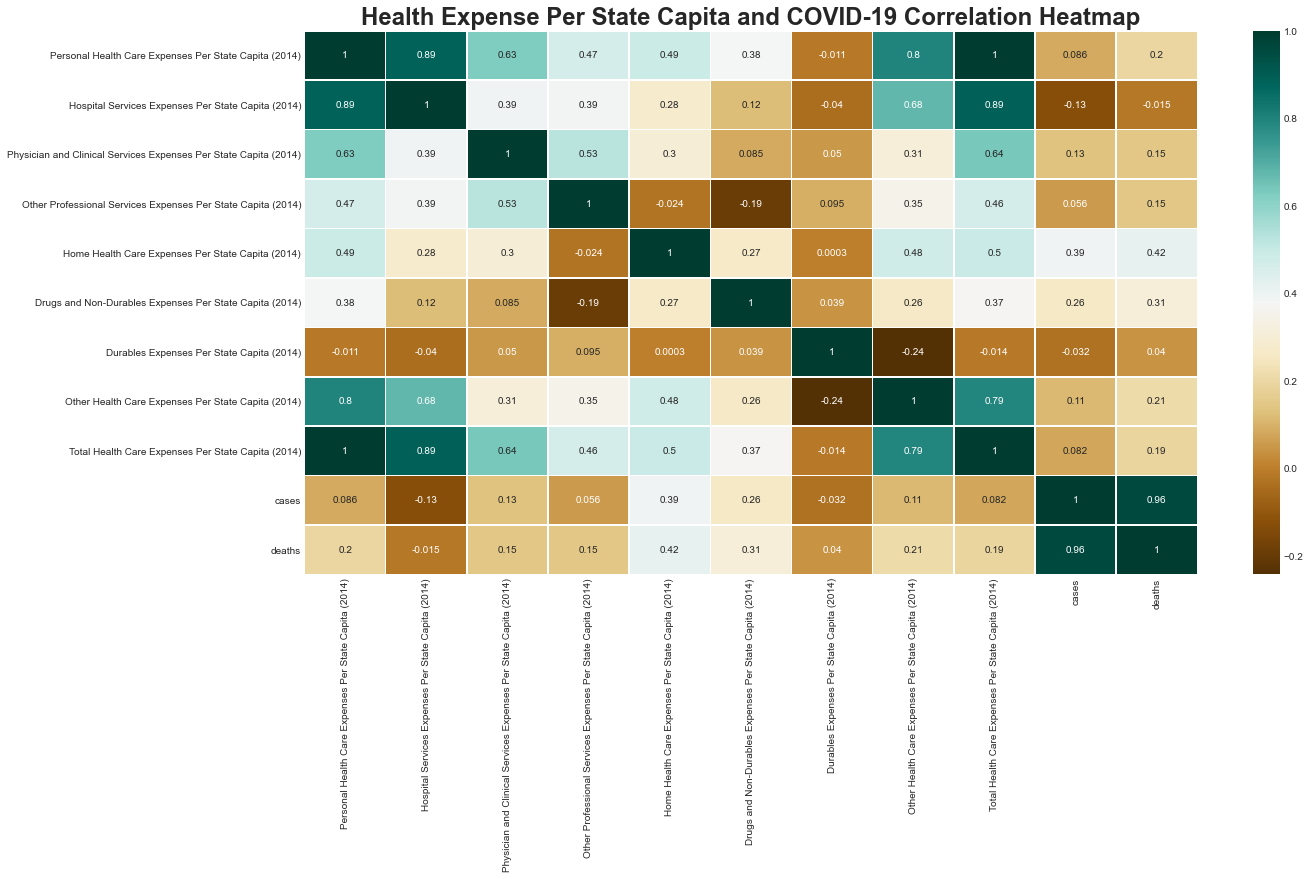

In [23]:
plt.figure(figsize = (20,10))
sns.heatmap(corr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('Health Expense Per State Capita and COVID-19 Correlation Heatmap', fontweight = 'bold', fontsize = 24);

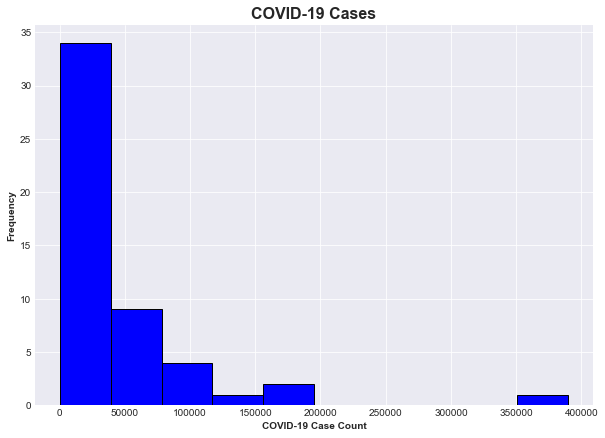

In [24]:
HPSCapDF['cases'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('COVID-19 Cases', fontsize = 16, fontweight = 'bold')
plt.xlabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

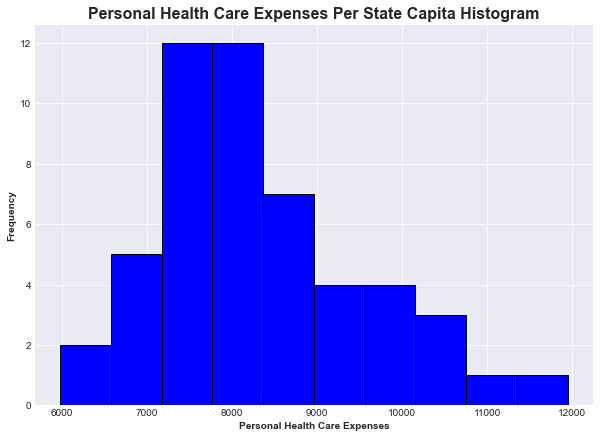

In [25]:
HPSCapDF['Personal Health Care Expenses Per State Capita (2014)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Personal Health Care Expenses Per State Capita Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Personal Health Care Expenses', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');


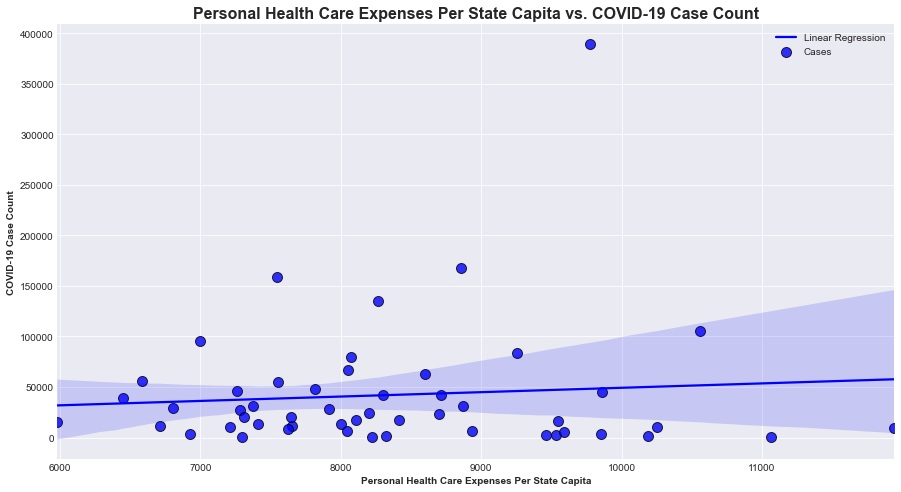

In [26]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Personal Health Care Expenses Per State Capita (2014)', y = 'cases', data = HPSCapDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Personal Health Care Expenses Per State Capita vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Personal Health Care Expenses Per State Capita', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [27]:
spearmanr(HPSCapDF['cases'], HPSCapDF['Personal Health Care Expenses Per State Capita (2014)'])

SpearmanrResult(correlation=-0.13221719457013573, pvalue=0.3550280721589504)

In [28]:
model1 = sm.OLS(HPSCapDF['cases'], HPSCapDF['Personal Health Care Expenses Per State Capita (2014)']).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.313
Model:                            OLS   Adj. R-squared (uncentered):              0.300
Method:                 Least Squares   F-statistic:                              22.82
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    1.60e-05
Time:                        17:59:29   Log-Likelihood:                         -635.69
No. Observations:                  51   AIC:                                      1273.
Df Residuals:                      50   BIC:                                      1275.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Personal Health Care Expenses Per State Capita (2014)     5.0247      1.052      4.777      0.000       2.912       7.137
==============================================================================
Omnibus:                       66.214   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              563.696
Skew:                           3.421   Prob(JB):                    3.93e-123
Kurtosis:                      17.781   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

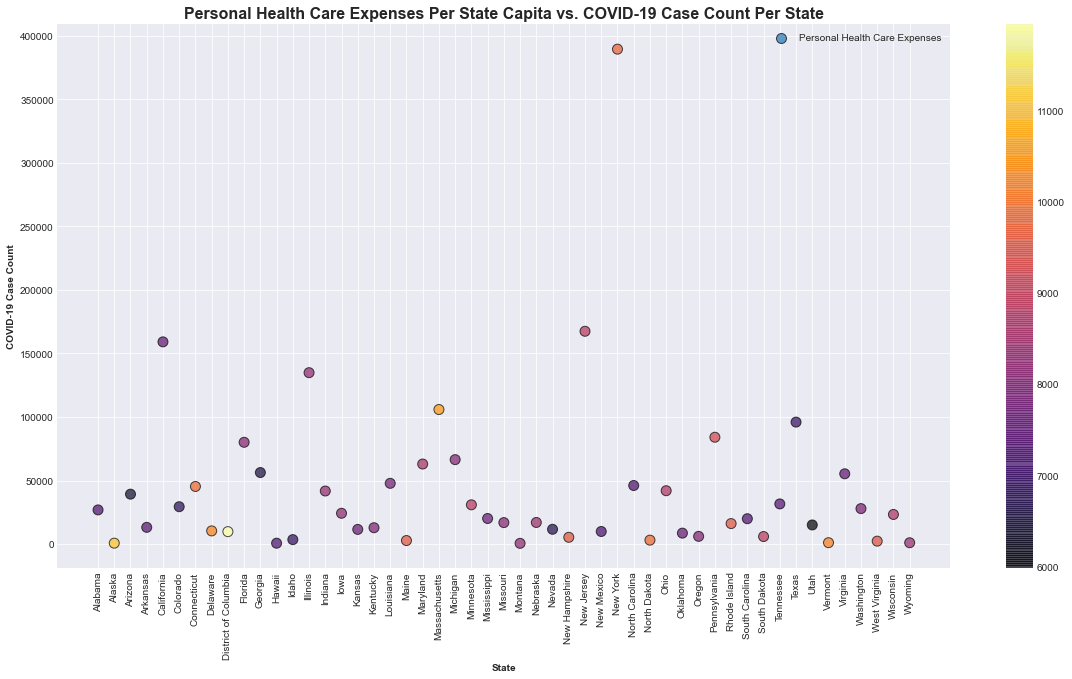

In [29]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HPSCapDF['State'] 
y = HPSCapDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = HPSCapDF['Personal Health Care Expenses Per State Capita (2014)'], cmap = 'inferno')
plt.title('Personal Health Care Expenses Per State Capita vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Personal Health Care Expenses'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

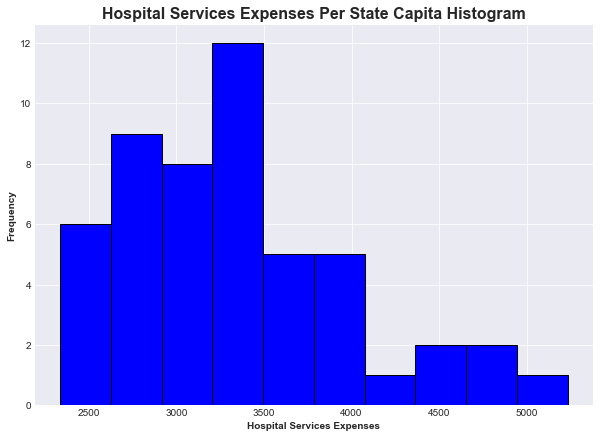

In [30]:
HPSCapDF['Hospital Services Expenses Per State Capita (2014)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Hospital Services Expenses Per State Capita Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Hospital Services Expenses', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

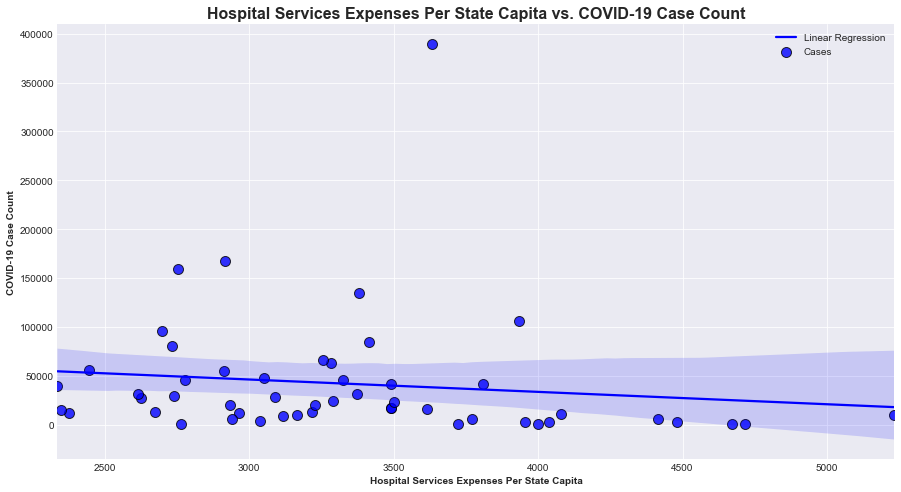

In [31]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Hospital Services Expenses Per State Capita (2014)', y = 'cases', data = HPSCapDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Hospital Services Expenses Per State Capita vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Hospital Services Expenses Per State Capita', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [32]:
spearmanr(HPSCapDF['cases'], HPSCapDF['Hospital Services Expenses Per State Capita (2014)'])

SpearmanrResult(correlation=-0.37496606181268216, pvalue=0.006705976739479162)

In [33]:
model2 = sm.OLS(HPSCapDF['cases'], HPSCapDF['Hospital Services Expenses Per State Capita (2014)']).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.275
Model:                            OLS   Adj. R-squared (uncentered):              0.261
Method:                 Least Squares   F-statistic:                              18.99
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    6.53e-05
Time:                        17:59:30   Log-Likelihood:                         -637.06
No. Observations:                  51   AIC:                                      1276.
Df Residuals:                      50   BIC:                                      1278.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Hospital Services Expenses Per State Capita (2014)    11.6968      2.684      4.358      0.000       6.306      17.088
==============================================================================
Omnibus:                       63.720   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              498.151
Skew:                           3.280   Prob(JB):                    6.73e-109
Kurtosis:                      16.834   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

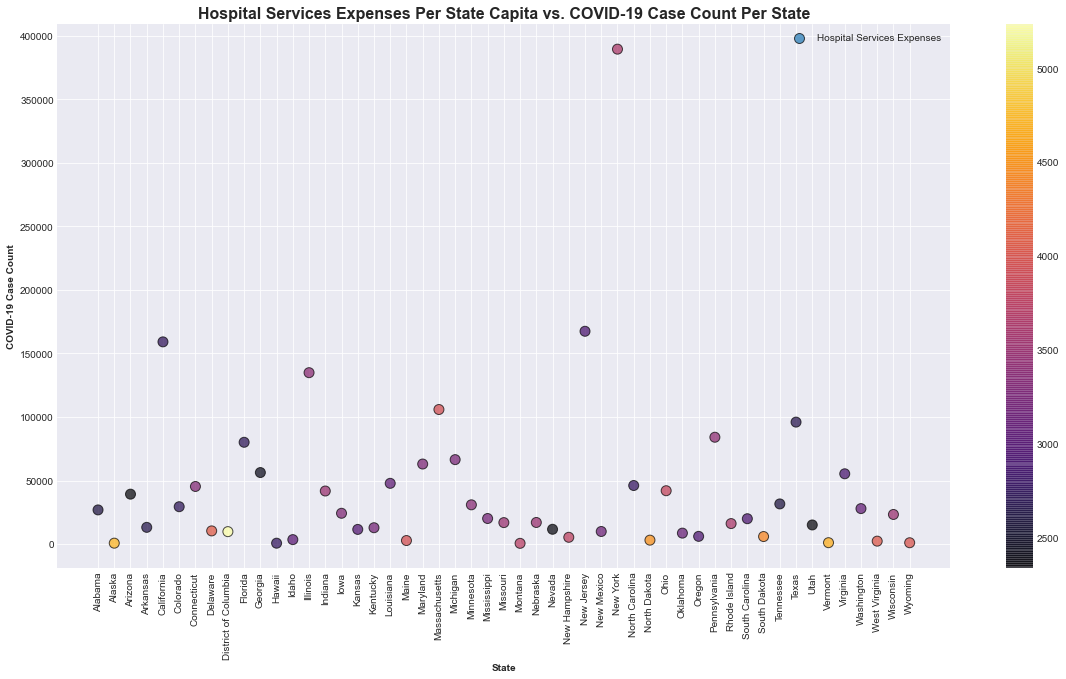

In [34]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HPSCapDF['State'] 
y = HPSCapDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = HPSCapDF['Hospital Services Expenses Per State Capita (2014)'], cmap = 'inferno')
plt.title('Hospital Services Expenses Per State Capita vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Hospital Services Expenses'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

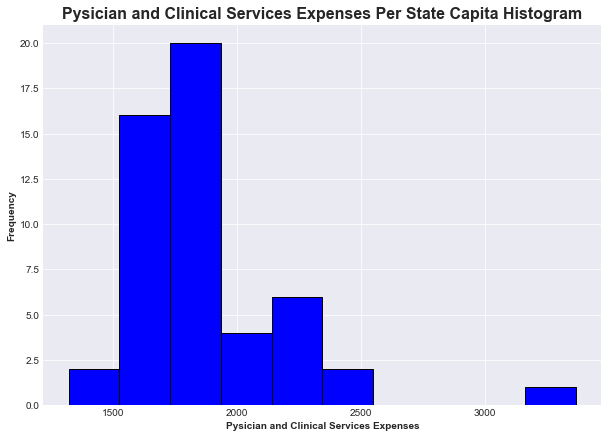

In [35]:
HPSCapDF['Physician and Clinical Services Expenses Per State Capita (2014)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Pysician and Clinical Services Expenses Per State Capita Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Pysician and Clinical Services Expenses', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

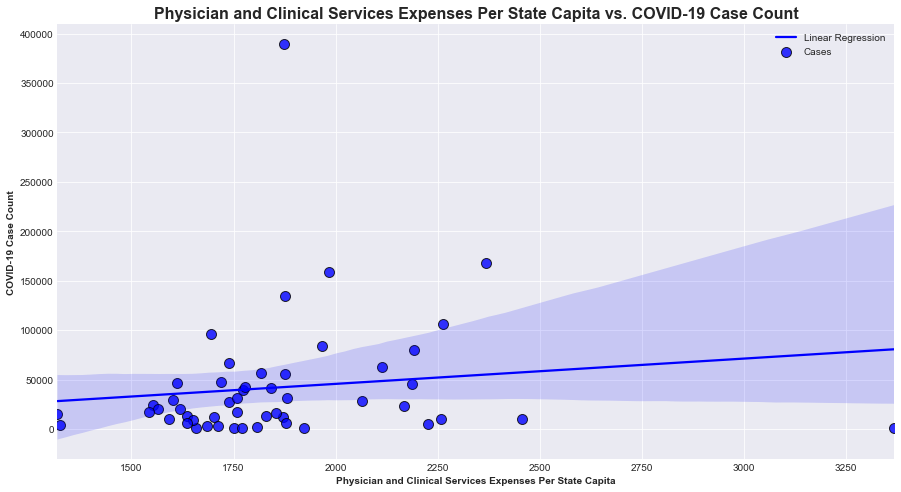

In [36]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Physician and Clinical Services Expenses Per State Capita (2014)', y = 'cases', data = HPSCapDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Physician and Clinical Services Expenses Per State Capita vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Physician and Clinical Services Expenses Per State Capita', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [37]:
spearmanr(HPSCapDF['cases'], HPSCapDF['Physician and Clinical Services Expenses Per State Capita (2014)'])

SpearmanrResult(correlation=0.23643068853762791, pvalue=0.0948463327484254)

In [38]:
model3 = sm.OLS(HPSCapDF['cases'], HPSCapDF['Physician and Clinical Services Expenses Per State Capita (2014)']).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.320
Model:                            OLS   Adj. R-squared (uncentered):              0.307
Method:                 Least Squares   F-statistic:                              23.55
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    1.23e-05
Time:                        17:59:31   Log-Likelihood:                         -635.43
No. Observations:                  51   AIC:                                      1273.
Df Residuals:                      50   BIC:                                      1275.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Physician and Clinical Services Expenses Per State Capita (2014)    22.6723      4.672      4.853      0.000      13.288      32.056
==============================================================================
Omnibus:                       69.844   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              687.771
Skew:                           3.614   Prob(JB):                    4.49e-150
Kurtosis:                      19.475   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

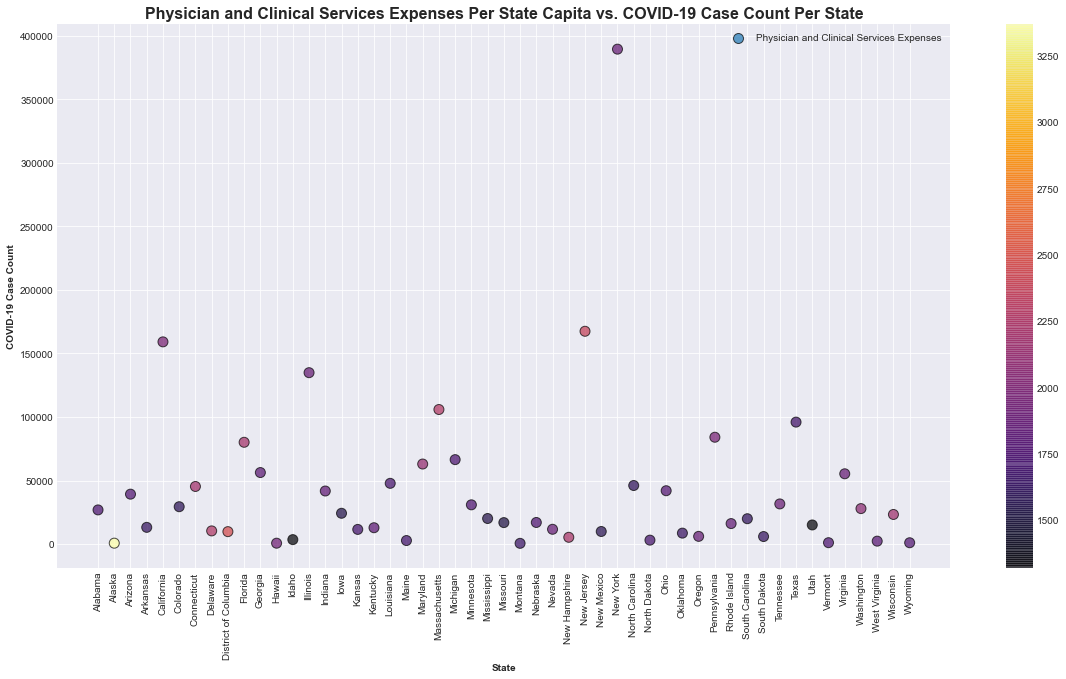

In [39]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HPSCapDF['State'] 
y = HPSCapDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = HPSCapDF['Physician and Clinical Services Expenses Per State Capita (2014)'], cmap = 'inferno')
plt.title('Physician and Clinical Services Expenses Per State Capita vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Physician and Clinical Services Expenses'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

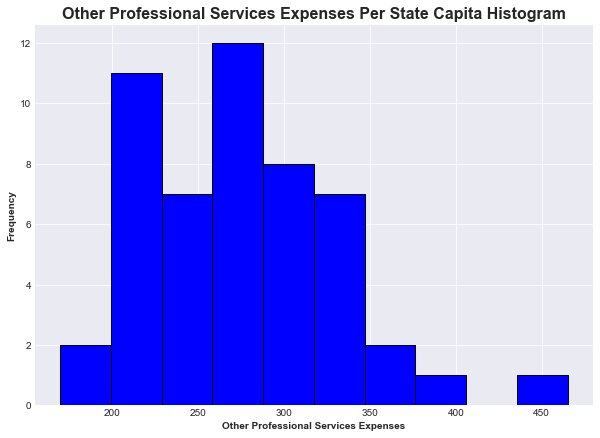

In [40]:
HPSCapDF['Other Professional Services Expenses Per State Capita (2014)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Other Professional Services Expenses Per State Capita Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Other Professional Services Expenses', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

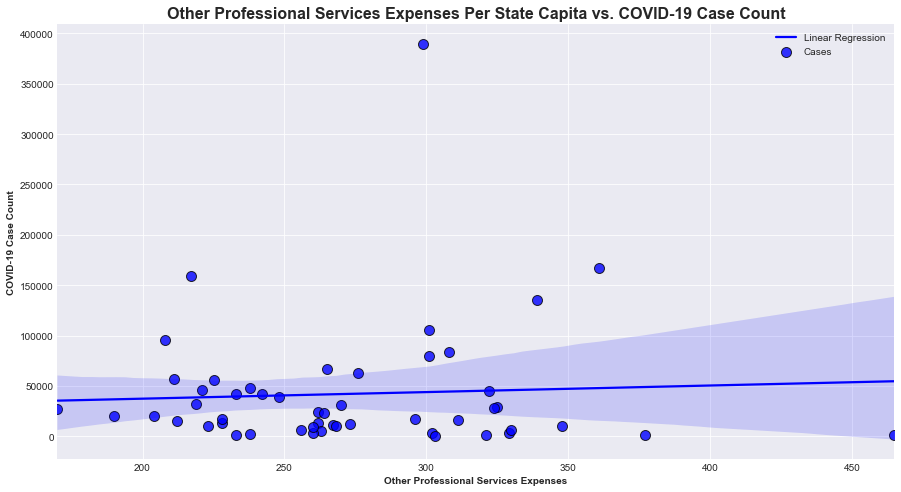

In [41]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Other Professional Services Expenses Per State Capita (2014)', y = 'cases', data = HPSCapDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Other Professional Services Expenses Per State Capita vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Other Professional Services Expenses', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [42]:
spearmanr(HPSCapDF['cases'], HPSCapDF['Other Professional Services Expenses Per State Capita (2014)'])

SpearmanrResult(correlation=-0.14721455536859682, pvalue=0.3025930008294271)

In [43]:
model4 = sm.OLS(HPSCapDF['cases'], HPSCapDF['Other Professional Services Expenses Per State Capita (2014)']).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.307
Model:                            OLS   Adj. R-squared (uncentered):              0.293
Method:                 Least Squares   F-statistic:                              22.12
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    2.05e-05
Time:                        17:59:33   Log-Likelihood:                         -635.93
No. Observations:                  51   AIC:                                      1274.
Df Residuals:                      50   BIC:                                      1276.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
Other Professional Services Expenses Per State Capita (2014)   150.7615     32.056      4.703      0.000      86.376     215.147
==============================================================================
Omnibus:                       66.395   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              580.287
Skew:                           3.415   Prob(JB):                    9.83e-127
Kurtosis:                      18.047   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

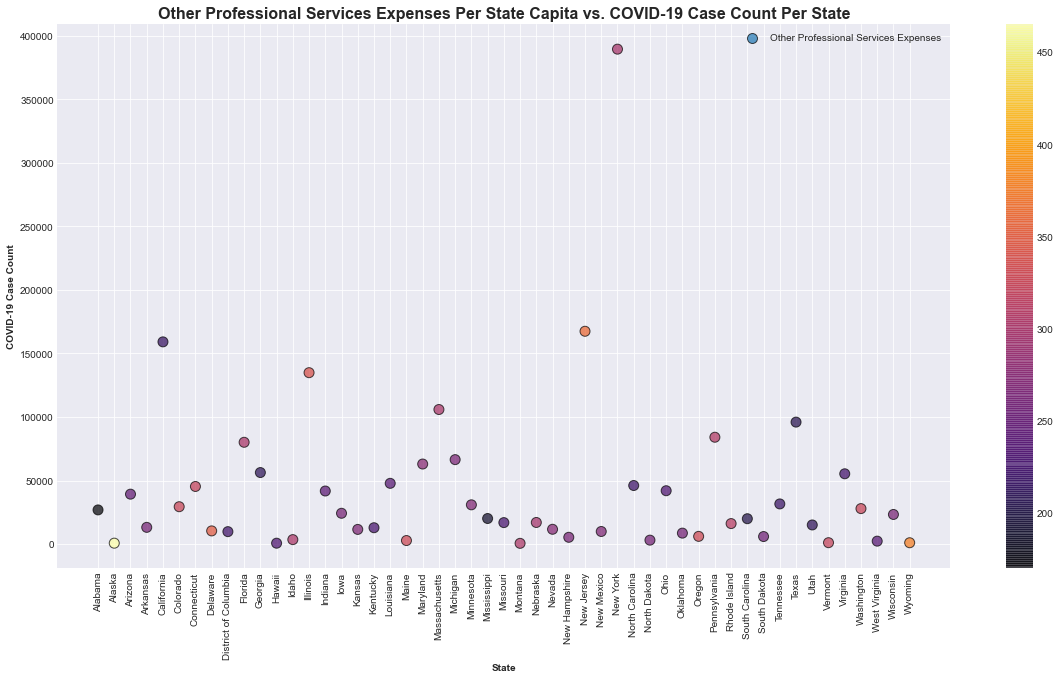

In [44]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HPSCapDF['State'] 
y = HPSCapDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = HPSCapDF['Other Professional Services Expenses Per State Capita (2014)'], cmap = 'inferno')
plt.title('Other Professional Services Expenses Per State Capita vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Other Professional Services Expenses'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

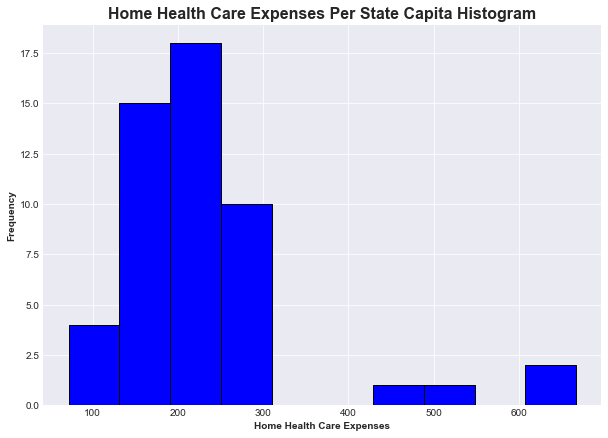

In [45]:
HPSCapDF['Home Health Care Expenses Per State Capita (2014)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Home Health Care Expenses Per State Capita Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Home Health Care Expenses', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

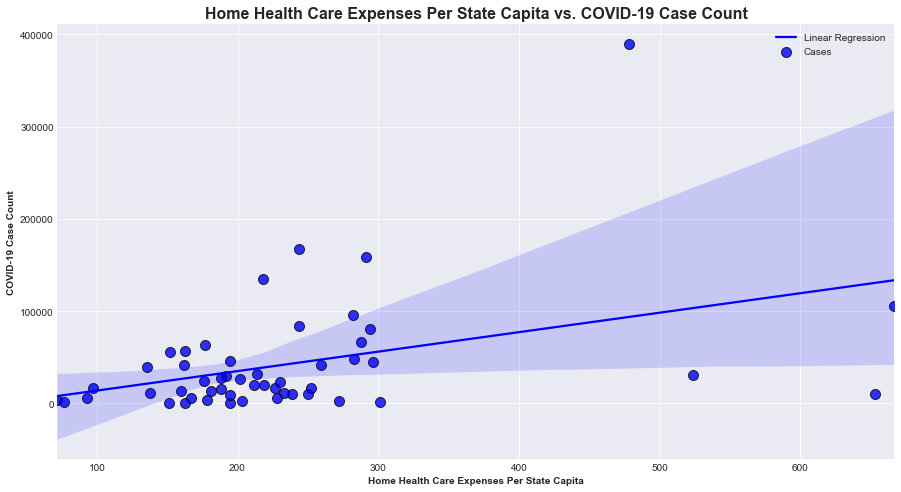

In [46]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Home Health Care Expenses Per State Capita (2014)', y = 'cases', data = HPSCapDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Home Health Care Expenses Per State Capita vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Home Health Care Expenses Per State Capita', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [47]:
spearmanr(HPSCapDF['cases'], HPSCapDF['Home Health Care Expenses Per State Capita (2014)'])

SpearmanrResult(correlation=0.3776616253562891, pvalue=0.006291898434170251)

In [48]:
model5 = sm.OLS(HPSCapDF['cases'], HPSCapDF['Home Health Care Expenses Per State Capita (2014)']).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.414
Model:                            OLS   Adj. R-squared (uncentered):              0.403
Method:                 Least Squares   F-statistic:                              35.38
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    2.64e-07
Time:                        17:59:34   Log-Likelihood:                         -631.63
No. Observations:                  51   AIC:                                      1265.
Df Residuals:                      50   BIC:                                      1267.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Home Health Care Expenses Per State Capita (2014)   186.2864     31.319      5.948      0.000     123.380     249.193
==============================================================================
Omnibus:                       58.975   Durbin-Watson:                   2.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              415.387
Skew:                           2.979   Prob(JB):                     6.31e-91
Kurtosis:                      15.648   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

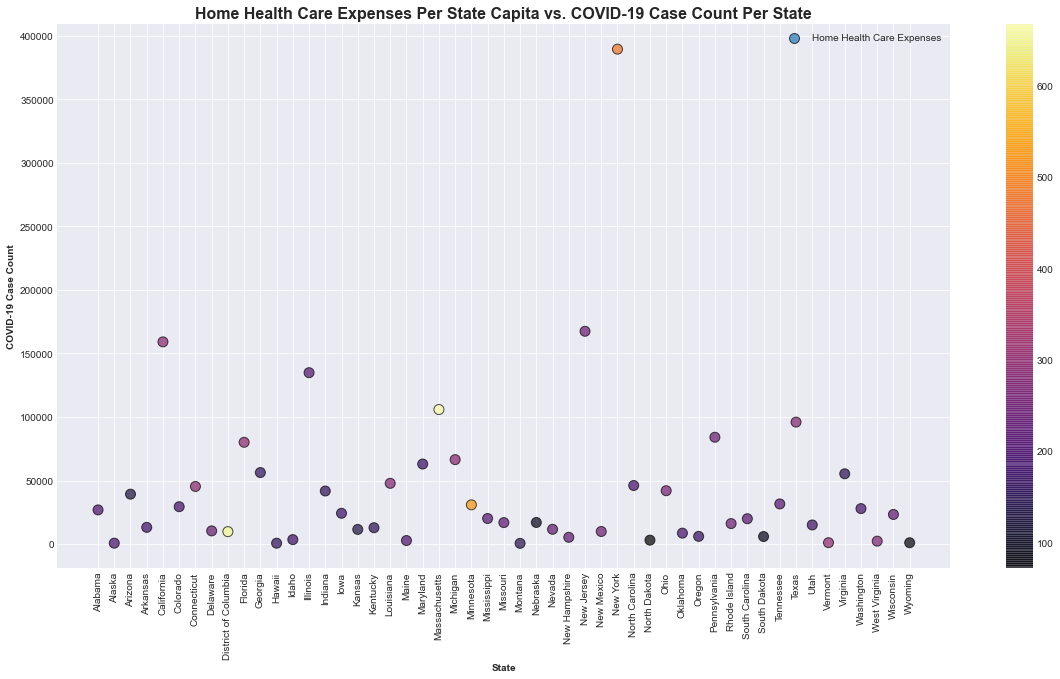

In [49]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HPSCapDF['State'] 
y = HPSCapDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = HPSCapDF['Home Health Care Expenses Per State Capita (2014)'], cmap = 'inferno')
plt.title('Home Health Care Expenses Per State Capita vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Home Health Care Expenses'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

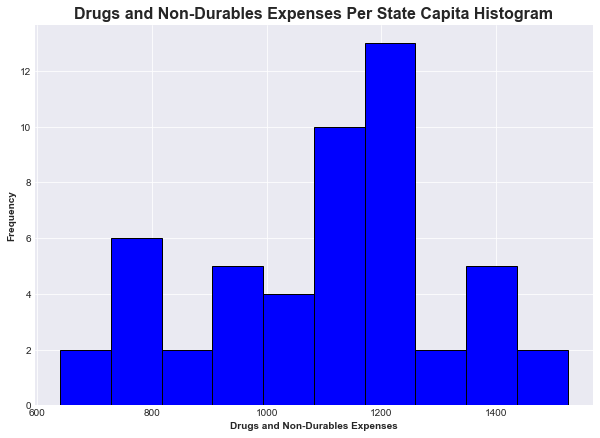

In [51]:
HPSCapDF['Drugs and Non-Durables Expenses Per State Capita (2014)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Drugs and Non-Durables Expenses Per State Capita Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Drugs and Non-Durables Expenses', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

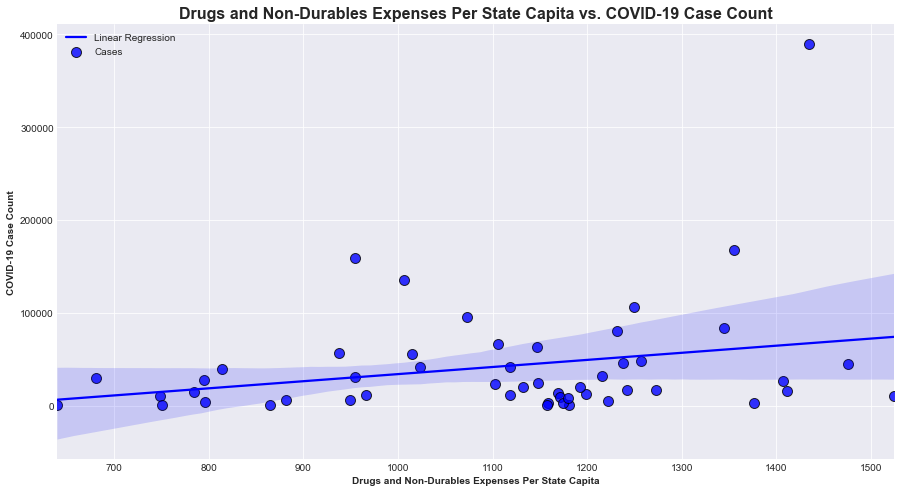

In [52]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Drugs and Non-Durables Expenses Per State Capita (2014)', y = 'cases', data = HPSCapDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Drugs and Non-Durables Expenses Per State Capita vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Drugs and Non-Durables Expenses Per State Capita', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [53]:
spearmanr(HPSCapDF['cases'], HPSCapDF['Drugs and Non-Durables Expenses Per State Capita (2014)'])

SpearmanrResult(correlation=0.20114032329747464, pvalue=0.15697171923595124)

In [54]:
model6 = sm.OLS(HPSCapDF['cases'], HPSCapDF['Drugs and Non-Durables Expenses Per State Capita (2014)']).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.343
Model:                            OLS   Adj. R-squared (uncentered):              0.330
Method:                 Least Squares   F-statistic:                              26.11
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    5.09e-06
Time:                        18:00:27   Log-Likelihood:                         -634.56
No. Observations:                  51   AIC:                                      1271.
Df Residuals:                      50   BIC:                                      1273.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================================
                                                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
Drugs and Non-Durables Expenses Per State Capita (2014)    39.3645      7.704      5.109      0.000      23.890      54.839
==============================================================================
Omnibus:                       67.424   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              592.845
Skew:                           3.497   Prob(JB):                    1.84e-129
Kurtosis:                      18.168   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

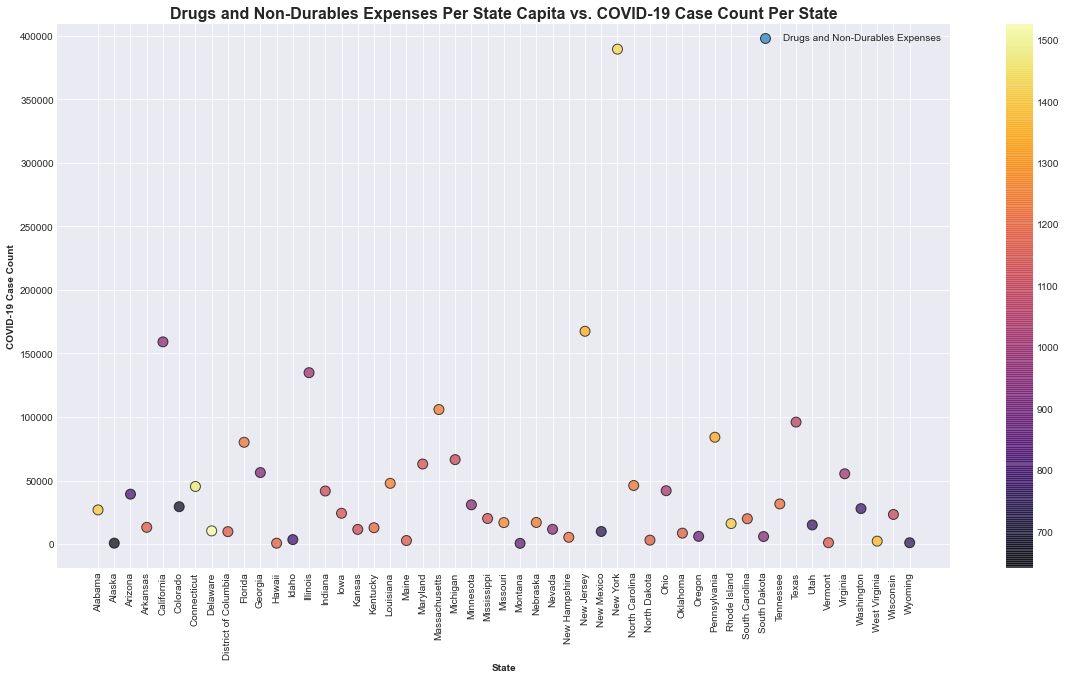

In [55]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HPSCapDF['State'] 
y = HPSCapDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = HPSCapDF['Drugs and Non-Durables Expenses Per State Capita (2014)'], cmap = 'inferno')
plt.title('Drugs and Non-Durables Expenses Per State Capita vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Drugs and Non-Durables Expenses'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

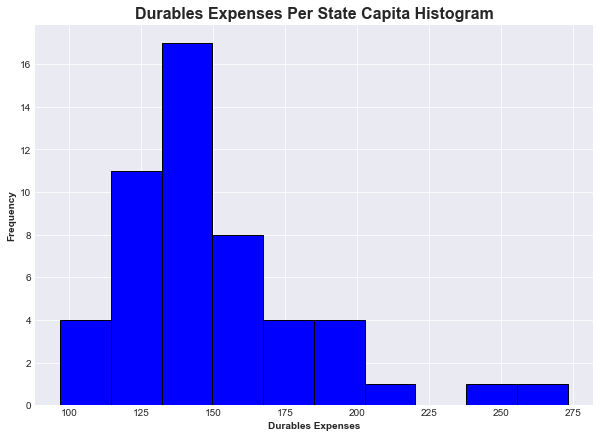

In [56]:
HPSCapDF['Durables Expenses Per State Capita (2014)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Durables Expenses Per State Capita Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Durables Expenses', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

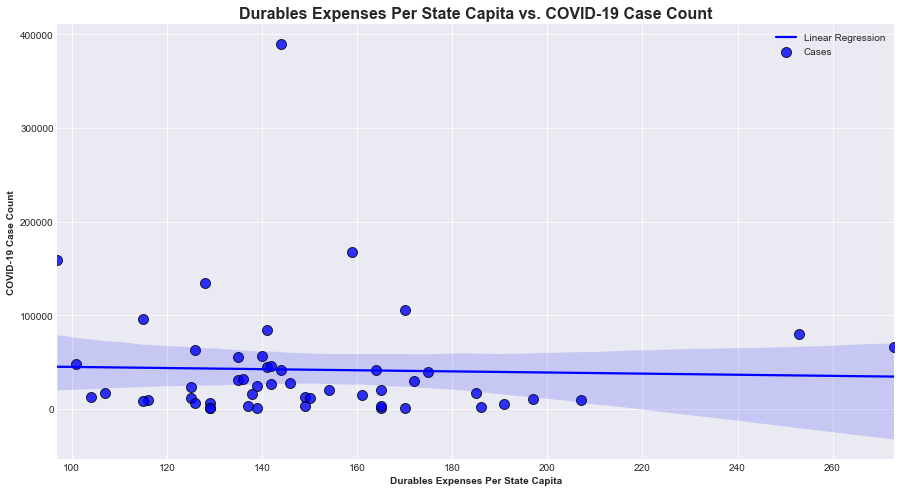

In [57]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Durables Expenses Per State Capita (2014)', y = 'cases', data = HPSCapDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Durables Expenses Per State Capita vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Durables Expenses Per State Capita', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [58]:
spearmanr(HPSCapDF['cases'], HPSCapDF['Durables Expenses Per State Capita (2014)'])

SpearmanrResult(correlation=-0.06962111844815523, pvalue=0.6273515156044598)

In [59]:
model7 = sm.OLS(HPSCapDF['cases'], HPSCapDF['Durables Expenses Per State Capita (2014)']).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.288
Model:                            OLS   Adj. R-squared (uncentered):              0.273
Method:                 Least Squares   F-statistic:                              20.18
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    4.19e-05
Time:                        18:00:28   Log-Likelihood:                         -636.63
No. Observations:                  51   AIC:                                      1275.
Df Residuals:                      50   BIC:                                      1277.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Durables Expenses Per State Capita (2014)   264.4576     58.876      4.492      0.000     146.201     382.714
==============================================================================
Omnibus:                       68.106   Durbin-Watson:                   2.258
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              608.681
Skew:                           3.542   Prob(JB):                    6.71e-133
Kurtosis:                      18.371   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

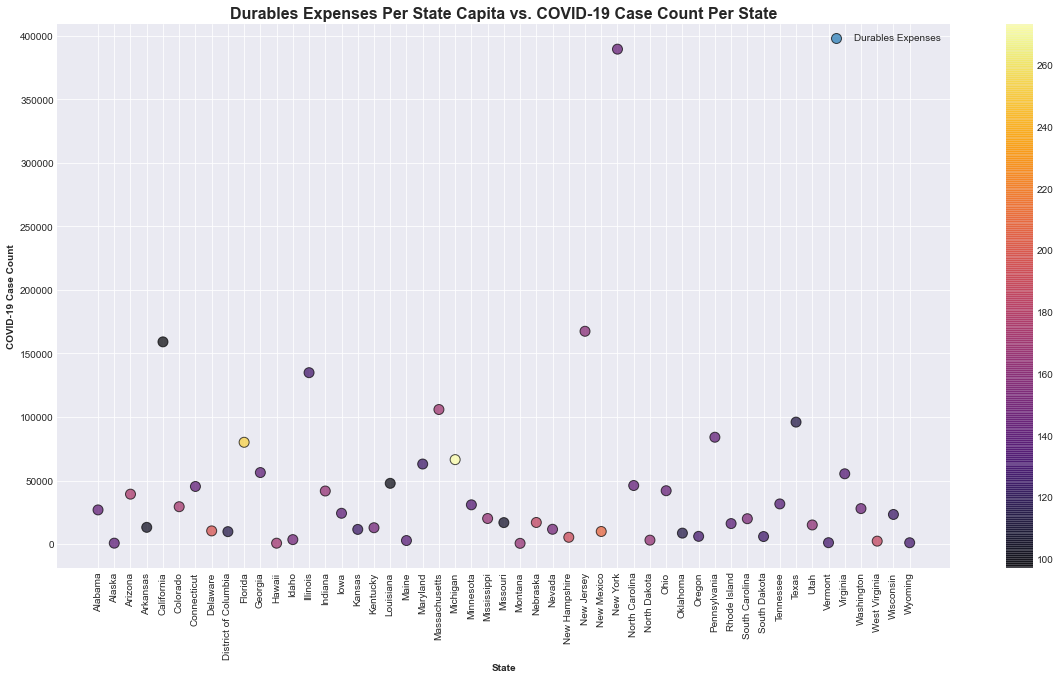

In [60]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HPSCapDF['State'] 
y = HPSCapDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = HPSCapDF['Durables Expenses Per State Capita (2014)'], cmap = 'inferno')
plt.title('Durables Expenses Per State Capita vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Durables Expenses'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

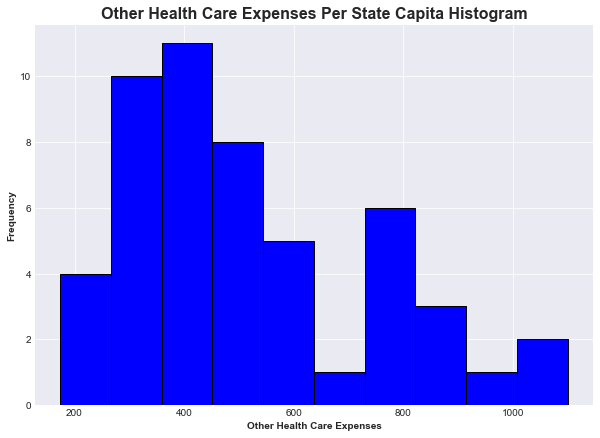

In [61]:
HPSCapDF['Other Health Care Expenses Per State Capita (2014)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Other Health Care Expenses Per State Capita Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Other Health Care Expenses', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

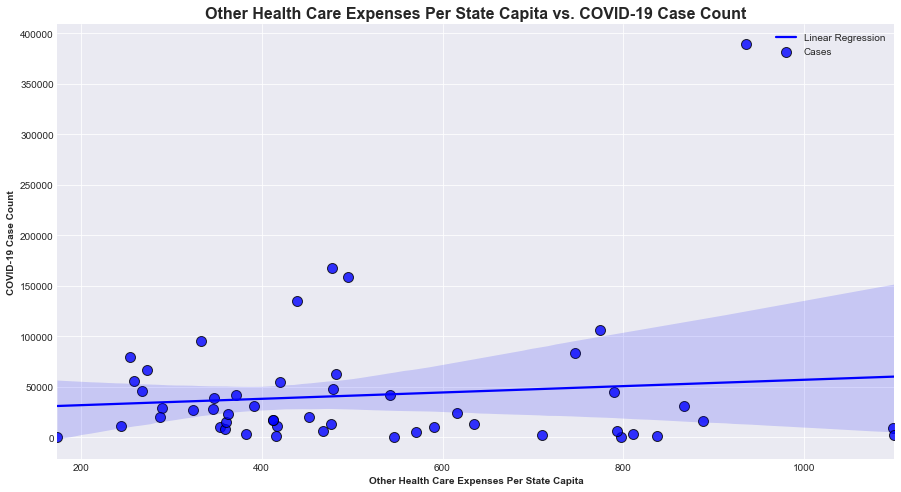

In [62]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Other Health Care Expenses Per State Capita (2014)', y = 'cases', data = HPSCapDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Other Health Care Expenses Per State Capita vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Other Health Care Expenses Per State Capita', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [63]:
spearmanr(HPSCapDF['cases'], HPSCapDF['Other Health Care Expenses Per State Capita (2014)'])

SpearmanrResult(correlation=-0.1714027149321267, pvalue=0.22911615386744275)

In [64]:
model8 = sm.OLS(HPSCapDF['cases'], HPSCapDF['Other Health Care Expenses Per State Capita (2014)']).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.299
Model:                            OLS   Adj. R-squared (uncentered):              0.285
Method:                 Least Squares   F-statistic:                              21.30
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    2.76e-05
Time:                        18:00:29   Log-Likelihood:                         -636.22
No. Observations:                  51   AIC:                                      1274.
Df Residuals:                      50   BIC:                                      1276.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Other Health Care Expenses Per State Capita (2014)    72.9428     15.804      4.616      0.000      41.201     104.685
==============================================================================
Omnibus:                       52.939   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              289.948
Skew:                           2.699   Prob(JB):                     1.09e-63
Kurtosis:                      13.359   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

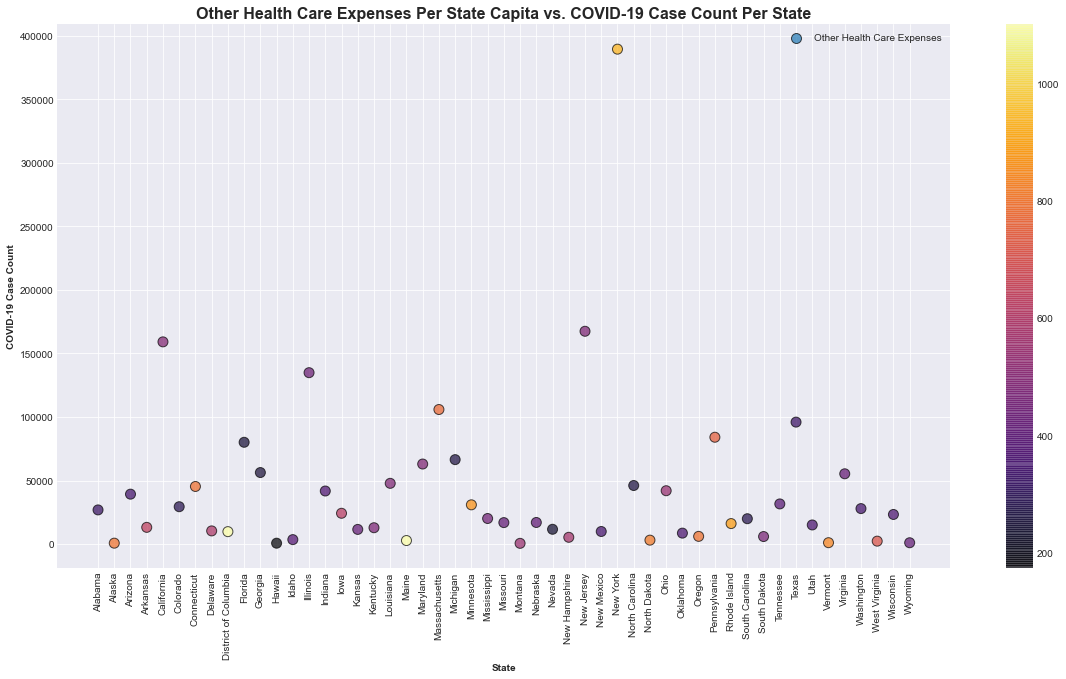

In [65]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HPSCapDF['State'] 
y = HPSCapDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = HPSCapDF['Other Health Care Expenses Per State Capita (2014)'], cmap = 'inferno')
plt.title('Other Health Care Expenses Per State Capita vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Other Health Care Expenses'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

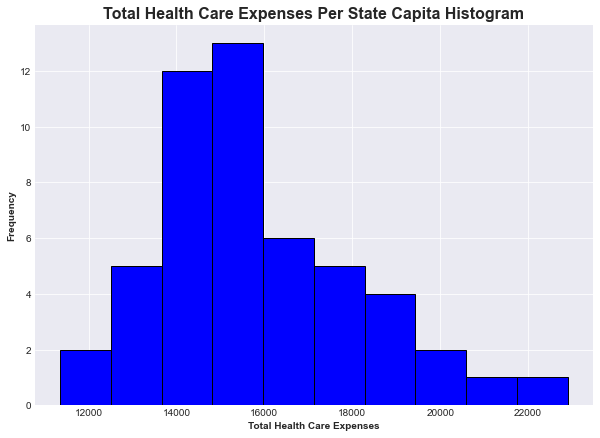

In [66]:
HPSCapDF['Total Health Care Expenses Per State Capita (2014)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Total Health Care Expenses Per State Capita Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Total Health Care Expenses', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

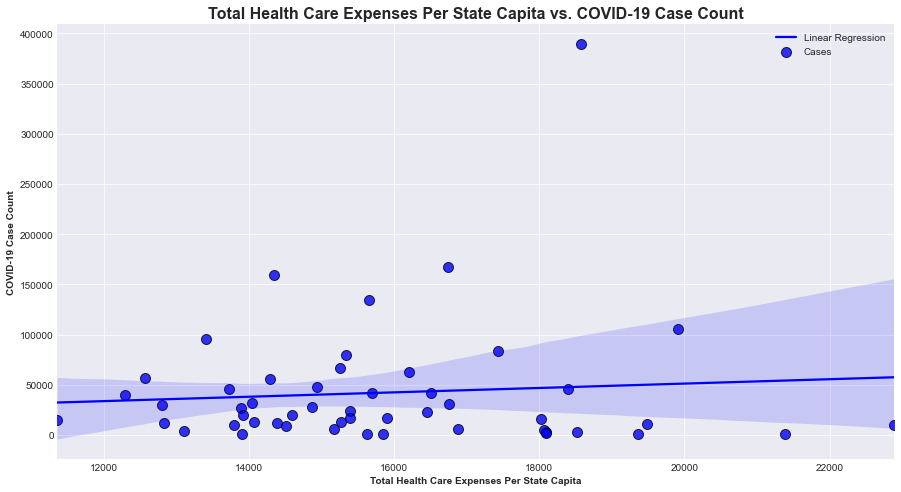

In [67]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Total Health Care Expenses Per State Capita (2014)', y = 'cases', data = HPSCapDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Total Health Care Expenses Per State Capita vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Total Health Care Expenses Per State Capita', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [68]:
spearmanr(HPSCapDF['cases'], HPSCapDF['Total Health Care Expenses Per State Capita (2014)'])

SpearmanrResult(correlation=-0.136289592760181, pvalue=0.34026961346335405)

In [69]:
model9 = sm.OLS(HPSCapDF['cases'], HPSCapDF['Total Health Care Expenses Per State Capita (2014)']).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.313
Model:                            OLS   Adj. R-squared (uncentered):              0.299
Method:                 Least Squares   F-statistic:                              22.76
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    1.63e-05
Time:                        18:00:30   Log-Likelihood:                         -635.71
No. Observations:                  51   AIC:                                      1273.
Df Residuals:                      50   BIC:                                      1275.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Total Health Care Expenses Per State Capita (2014)     2.6472      0.555      4.771      0.000       1.533       3.762
==============================================================================
Omnibus:                       66.100   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              560.749
Skew:                           3.414   Prob(JB):                    1.72e-122
Kurtosis:                      17.740   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

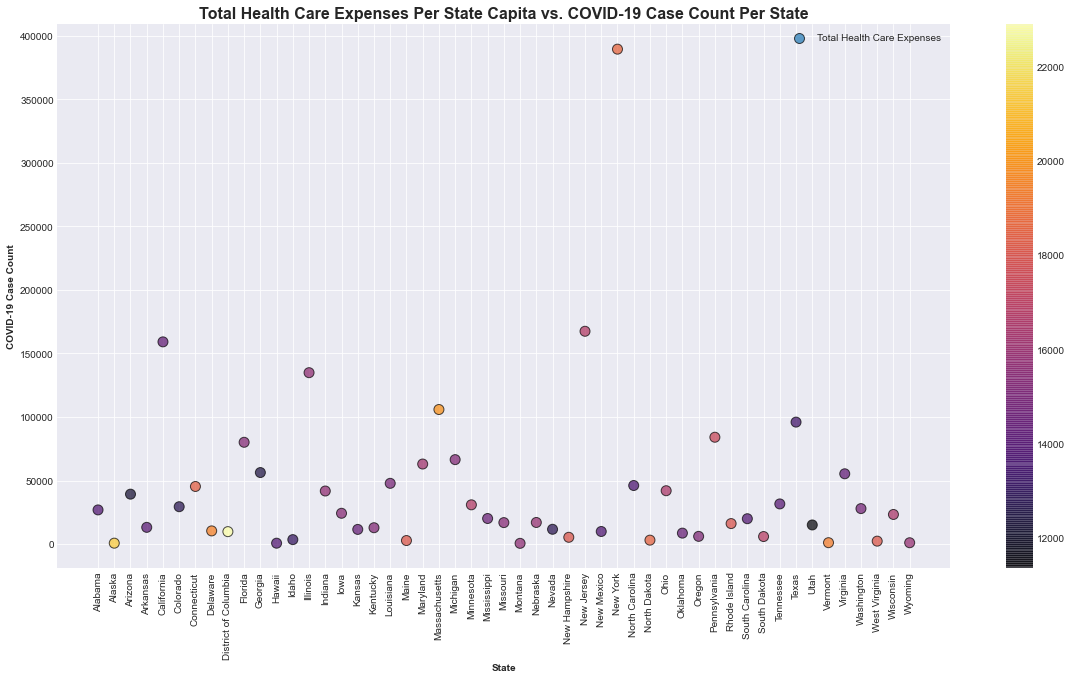

In [70]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HPSCapDF['State'] 
y = HPSCapDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = HPSCapDF['Total Health Care Expenses Per State Capita (2014)'], cmap = 'inferno')
plt.title('Total Health Care Expenses Per State Capita vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Total Health Care Expenses'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

In [71]:
model10 = sm.OLS(HPSCapDF['cases'], HPSCapDF[['Personal Health Care Expenses Per State Capita (2014)', 'Hospital Services Expenses Per State Capita (2014)',
                                      'Physician and Clinical Services Expenses Per State Capita (2014)', 'Other Professional Services Expenses Per State Capita (2014)',
                                      'Home Health Care Expenses Per State Capita (2014)', 'Drugs and Non-Durables Expenses Per State Capita (2014)',
                                      'Durables Expenses Per State Capita (2014)', 'Other Health Care Expenses Per State Capita (2014)', 'Total Health Care Expenses Per State Capita (2014)']]).fit()
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.521
Model:                            OLS   Adj. R-squared (uncentered):              0.432
Method:                 Least Squares   F-statistic:                              5.848
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    4.62e-05
Time:                        18:00:31   Log-Likelihood:                         -626.50
No. Observations:                  51   AIC:                                      1269.
Df Residuals:                      43   BIC:                                      1284.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Personal Health Care Expenses Per State Capita (2014)              -24.4061    139.864     -0.174      0.862    -306.468     257.656
Hospital Services Expenses Per State Capita (2014)                 -81.7186     42.012     -1.945      0.058    -166.444       3.007
Physician and Clinical Services Expenses Per State Capita (2014)   -49.2079     52.069     -0.945      0.350    -154.215      55.799
Other Professional Services Expenses Per State Capita (2014)       270.0070    204.391      1.321      0.193    -142.188     682.202
Home Health Care Expenses Per State Capita (2014)                  206.8540     85.181      2.428      0.019      35.069     378.639
Drugs and Non-Durables Expenses Per State Capita (2014)             20.4346     59.418      0.344      0.733     -99.394     140.263
Durables Expenses Per State Capita (2014)                         -255.3280    238.304     -1.071      0.290    -735.913     225.257
Other Health Care Expenses Per State Capita (2014)                 -53.0528     63.796     -0.832      0.410    -181.710      75.605
Total Health Care Expenses Per State Capita (2014)                  33.5823     69.375      0.484      0.631    -106.327     173.491
==============================================================================
Omnibus:                       55.793   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              360.541
Skew:                           2.796   Prob(JB):                     5.12e-79
Kurtosis:                      14.764   Cond. No.                     7.24e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.33e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""